In [ ]:
import pandas as pd
import numpy as np

info = pd.read_csv('titanic_train.csv')

info['Age'].fillna(int(info['Age'].mean()), inplace=True)

info['Embarked'].fillna('C', inplace=True)

x = info.drop('Survived',axis=1)
y = info['Survived']

x.drop(['Ticket', 'PassengerId', 'Name', 'Cabin'],axis=1,inplace=True)


In [ ]:
#Removing dummy values
sex = pd.get_dummies(x,drop_first=True)
x=pd.concat([x,sex],axis=1)

embark=pd.get_dummies(x,drop_first=True)
x=pd.concat([x,embark],axis=1)

x= x.drop(['Embarked', 'Sex'],axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
Linear.fit(X_train,y_train)



LinearRegression()

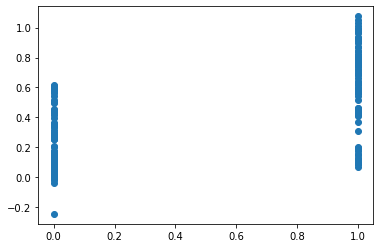

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

predictions = Linear.predict(X_test)
plt.scatter(y_test,predictions)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predictions)
print("r2 socre: ",score)
print("mean_sqrd_error: ",mean_squared_error(y_test,predictions))
print("root_mean_squared error of: ",np.sqrt(mean_squared_error(y_test,predictions)))

r2 socre is  0.4305580904347881
mean_sqrd_error is== 0.1407565283154857
root_mean_squared error of is== 0.3751753300997891
